In [1]:
from ecologico import Ecologico
from ultimatum import *
from agente import Agente
from estrategias import *
from genome import Genome, World
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
estrategias = {
    "Azarosa" : (estrat_proponer_rand, estrat_aceptar_rand, 20),
    "Mala_onda" : (estrat_proponer_rand, estrat_aceptar_nunca, 20),
    "Promedio" : (estrat_proponer_promedio, estrat_aceptar_promedio, 20),
    "Rata" : (estrat_proponer_rata, estrat_aceptar_siempre, 20),
    #"Antirrata" : (estrat_proponer_antirrata, estrat_aceptar_antirrata, 20),
    "Antirrata_2" : (estrat_proponer_antirrata_2, estrat_aceptar_antirrata, 20)
    }


# Parametros:
# n_turnos_por_generacion, n_generaciones, estrategias, n_agentes, n_aristas, topologia
ecologico_denso = Ecologico(5000, 100, estrategias, 100, 100*99/2, [])
ecologico_ralo  = Ecologico(5000, 100, estrategias, 100, 100-1, [])

ecologico_denso.topologia = create_random_adjacency_list(ecologico_denso.n_agentes, ecologico_denso.n_aristas)
ecologico_ralo.topologia = create_random_adjacency_list(ecologico_ralo.n_agentes, ecologico_ralo.n_aristas)

In [31]:
def contar_ganador_n_veces(eco, n):
    resultados_win = {estrat:0 for estrat in estrategias.keys()}
    for _ in range(n):
        historial_estrategias, _ = eco.competir()
        for estrat, value in historial_estrategias[-1].items():
            resultados_win[estrat] += value[2] / eco.n_agentes # value[2] es cantidad de agentes
        
    return resultados_win

simulaciones = 50
result_wins_denso = contar_ganador_n_veces(ecologico_denso, simulaciones)
result_wins_ralo = contar_ganador_n_veces(ecologico_ralo, simulaciones)

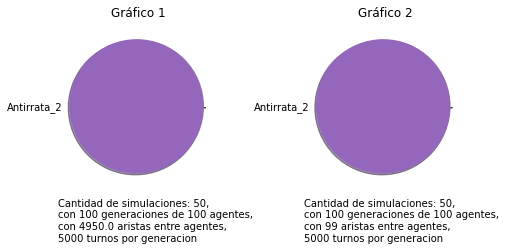

In [32]:
fig, ax = plt.subplots(ncols=2, figsize=(7,7))

ax[0].pie(x=list(result_wins_denso.values()), explode=[0.025]*len(estrategias),
          labels=[label if value > 0 else '' for label,value in result_wins_denso.items()],
          shadow=True)
ax[0].text(-1.2, -2, f"Cantidad de simulaciones: {simulaciones},\ncon {ecologico_denso.n_generaciones} generaciones de {ecologico_denso.n_agentes} agentes,\ncon {ecologico_denso.n_aristas} aristas entre agentes,\n{ecologico_denso.n_turnos_por_generacion} turnos por generacion")
ax[0].set_title('Gráfico 1')
ax[1].pie(x=list(result_wins_ralo.values()), explode=[0.025]*len(estrategias),
          labels=[label if value > 0 else '' for label,value in result_wins_ralo.items()],
          shadow=True)
ax[1].text(-1.2, -2, f"Cantidad de simulaciones: {simulaciones},\ncon {ecologico_ralo.n_generaciones} generaciones de {ecologico_ralo.n_agentes} agentes,\ncon {ecologico_ralo.n_aristas} aristas entre agentes,\n{ecologico_ralo.n_turnos_por_generacion} turnos por generacion")
ax[1].set_title('Gráfico 2')

plt.tight_layout()
plt.show()

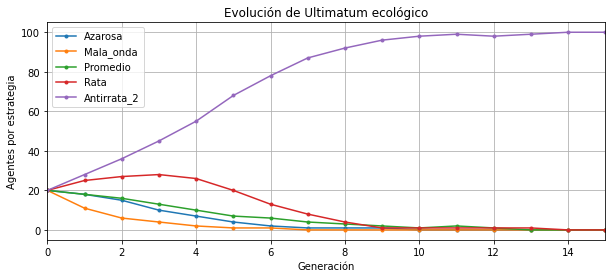

In [5]:
historial_estrategias, vecinos_fitness = ecologico_denso.competir()
data = [{key: value[2] for key, value in dic.items()} for dic in historial_estrategias]

df = pd.DataFrame(data)


plt.figure(figsize=(10, 4))
end = None
for estrategia in df.columns:
    plt.plot(df.index, df[estrategia], marker='.', label=estrategia)
    if end is None:  # Solo si aún no hemos encontrado un n_agentes
        idx_n = df[estrategia][df[estrategia] == ecologico_denso.n_agentes].index
        if not idx_n.empty:
            end = idx_n[0]
            
if end == None:
    end = ecologico_denso.n_generaciones

plt.xlim([0,end+1])
plt.xlabel('Generación')
plt.ylabel('Agentes por estrategia')
plt.title('Evolución de Ultimatum ecológico')
plt.legend()
plt.grid(True)
plt.show()

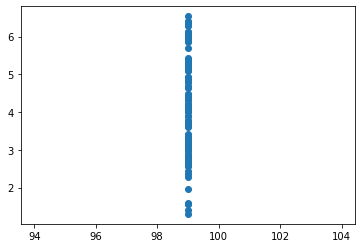

In [6]:
plt.scatter(vecinos_fitness[0], vecinos_fitness[1])